# 1) Importing libraries

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("darkgrid")
import datetime as dt
from scipy import stats

In [2]:
data = pd.read_csv('C:/Users/arunt/Documents/nyc-taxi-trip-duration/train.csv')
data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
print(data.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [5]:
data['trip_duration'].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [6]:
np.round(np.median(data['trip_duration'])/60,3)

11.033

In [7]:
np.round(np.mean(data['trip_duration'])/60,3)

15.992

In [8]:
np.round(np.min(data['trip_duration']),3)

1

In [9]:
np.round(np.max(data['trip_duration'])/3600,3)

979.523

### Observation:

1) A total of 11 features of which 3 are integers, 4 are floats and 4 are objects.

2) The average trip duration is 15.992 minutes and the median duration is 11.033 minutes. (The data is provided in seconds)

3) The minimumtrip duration is 1 second and the maximum trip duration is 979.523 hours. Both these values look extreme. They might be outliers.

# 2) Exploratory Data Analysis:

## Removing outliers - trip duration

In [3]:
z = np.abs(stats.zscore(data['trip_duration']))
print(z)

0          0.096324
1          0.056610
2          0.222343
3          0.101289
4          0.100143
             ...   
1458639    0.034653
1458640    0.058138
1458641    0.037326
1458642    0.111981
1458643    0.145394
Name: trip_duration, Length: 1458644, dtype: float64


In [4]:
t = np.where(z > 3)
print(t)
print(len(t[0]))

(array([    531,    1134,    1865, ..., 1457207, 1457752, 1458076],
      dtype=int64),)
2073


In [5]:
data.drop(t[0],inplace = True)

In [6]:
data.shape

(1456571, 11)

<AxesSubplot: title={'center': 'Distribution of trip duratiin in minutes'}, xlabel='trip_duration', ylabel='Count'>

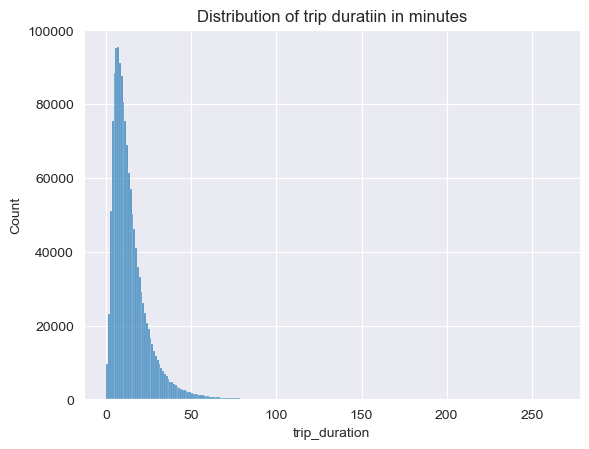

In [59]:
plt.title("Distribution of trip duratiin in minutes")
sb.histplot(data['trip_duration']/60, bins=250)

<AxesSubplot: xlabel='trip_duration', ylabel='Count'>

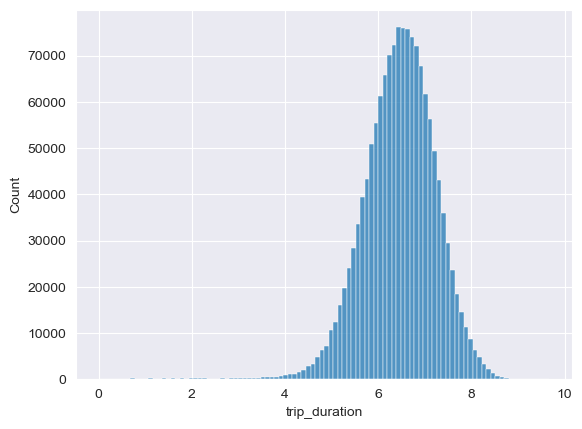

In [40]:
sb.histplot(np.log(data['trip_duration']), bins=100)

### Observation

1) The trip_duration looks to be skewed and not following the normal distribution.
2) So we convert into normal distribution using log transform

<AxesSubplot: xlabel='trip_duration', ylabel='Count'>

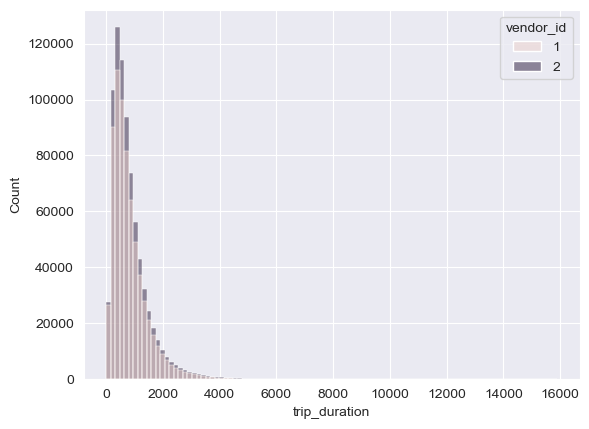

In [19]:
sb.histplot(data = data,x = 'trip_duration',hue='vendor_id', bins=100)

<AxesSubplot: xlabel='trip_duration', ylabel='Count'>

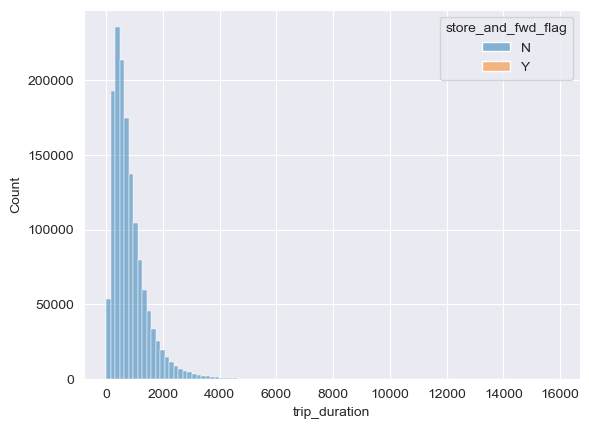

In [60]:
sb.histplot(data = data,x = 'trip_duration',hue='store_and_fwd_flag',bins=100)

In [21]:
def pdf_cdf_plots(data,variable,bins,plot_title,x_label,y_label='Probability'):
    counts, bins = np.histogram(data[variable],bins=bins,density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.title(plot_title)
    plt.plot(bins[1:],pdf[:],label='pdf')
    plt.xlabel(x_label)
    plt.plot(bins[1:],cdf[:],label='cdf')
    plt.ylabel(y_label)
    plt.legend(loc="upper left")
    plt.show()

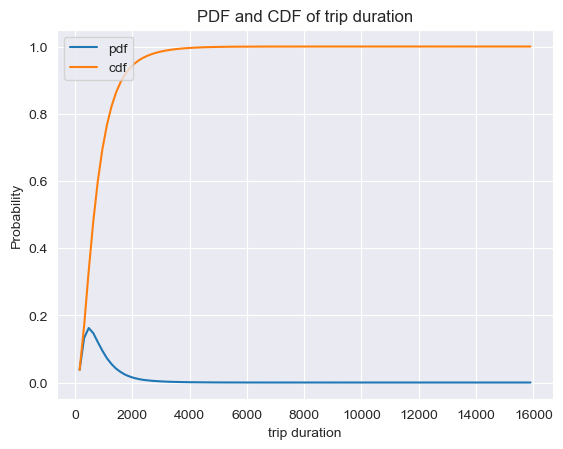

In [23]:
pdf_cdf_plots(data,'trip_duration',100,'PDF and CDF of trip duration',"trip duration")

## Removing outliers - location extents

In [ ]:
#plotting locations with outliers

plt.figure(figsize=(15,7.5))
plt.suptitle('Identifying outliers of pickup and dropoff locations in the data')
plt.subplot(1,2,1)
fig = sb.scatterplot(data = data,x='pickup_longitude',y='pickup_latitude')
fig.set(title = "Spatial distribution of pickup points",xlabel='longitude', ylabel='latitude')

plt.subplot(1,2,2)
fig = sb.scatterplot(data = data,x='dropoff_longitude',y='dropoff_latitude')
fig.set(title = "Spatial distribution of dropoff points",xlabel='longitude', ylabel='latitude')

plt.show()

In [7]:
data = data[(data["pickup_latitude"] <= 42.0) & (data["pickup_latitude"] >= 40.0)]
data = data[(data["pickup_longitude"] <= -72.0) & (data["pickup_longitude"] >= -75.0)]

In [8]:
data = data[(data["dropoff_latitude"] <= 42.0) & (data["dropoff_latitude"] >= 40.0)]
data = data[(data["dropoff_longitude"] <= -72.0) & (data["dropoff_longitude"] >= -75.0)]

In [9]:
data.shape

(1456535, 11)

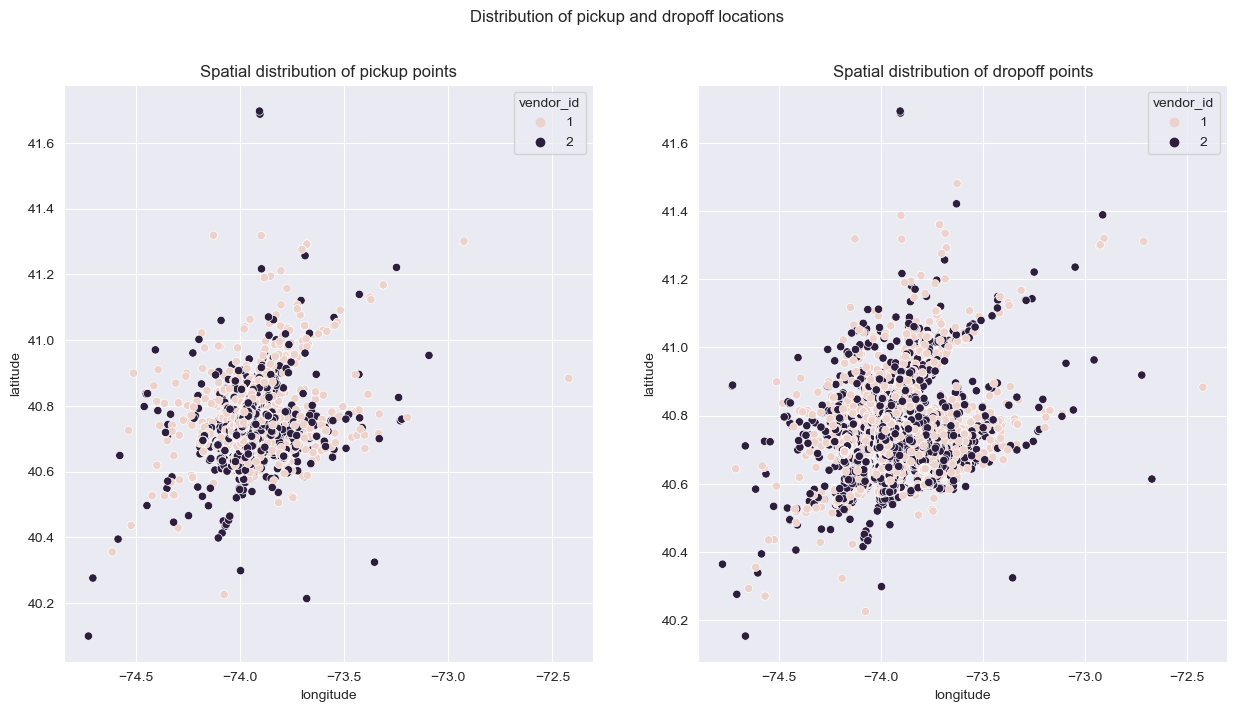

In [77]:
#plotting locations after removing outliers

plt.figure(figsize=(15,7.5))
plt.suptitle('Distribution of pickup and dropoff locations')
plt.subplot(1,2,1)
fig = sb.scatterplot(data = data,x='pickup_longitude',y='pickup_latitude',hue='vendor_id')
fig.set(title = "Spatial distribution of pickup points",xlabel='longitude', ylabel='latitude')

plt.subplot(1,2,2)
fig = sb.scatterplot(data = data,x='dropoff_longitude',y='dropoff_latitude',hue='vendor_id')
fig.set(title = "Spatial distribution of dropoff points",xlabel='longitude', ylabel='latitude')

plt.show()

C:\Users\arunt\anaconda3\envs\gpu-enabled-spatial\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


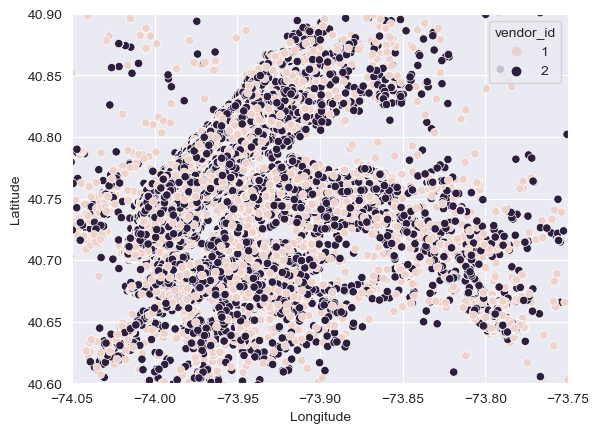

In [61]:
city_long_border = (-74.05, -73.75)
city_lat_border = (40.60, 40.90)

fig, ax = plt.subplots(ncols=1, nrows=1)
sb.scatterplot(data = data,x='pickup_longitude',y='pickup_latitude',hue='vendor_id')
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

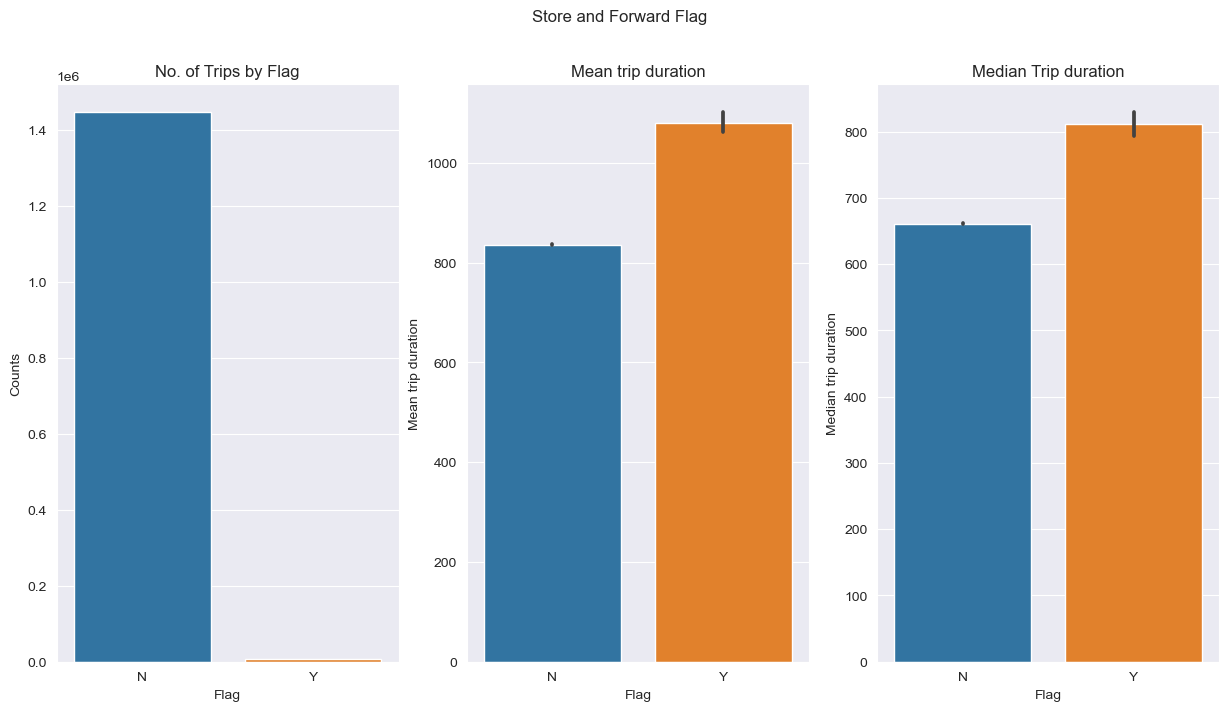

In [63]:
plt.figure(figsize=(15,7.5))
plt.suptitle('Store and Forward Flag')

plt.subplot(1,3,1)
fig = sb.countplot(x = data['store_and_fwd_flag'])
fig.set(title = "No. of Trips by Flag",xlabel='Flag', ylabel='Counts')

plt.subplot(1,3,2)
fig = sb.barplot(x = data['store_and_fwd_flag'],y=data['trip_duration'],estimator='mean')
fig.set(title = "Mean trip duration",xlabel='Flag', ylabel='Mean trip duration')

plt.subplot(1,3,3)
fig = sb.barplot(x = data['store_and_fwd_flag'],y=data['trip_duration'],estimator='median')
fig.set(title = "Median Trip duration",xlabel='Flag', ylabel='Median trip duration')
plt.show()

In [59]:
g_flag = data.groupby('store_and_fwd_flag')
g1 = g_flag.get_group('Y')
g1['trip_duration'].describe()

count    8045.000000
mean     1080.763331
std       925.645317
min         2.000000
25%       455.000000
50%       812.000000
75%      1400.000000
max      9984.000000
Name: trip_duration, dtype: float64

In [60]:
g2 = g_flag.get_group('N')
g2['trip_duration'].describe()

count    1.450599e+06
mean     9.588197e+02
std      5.251475e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.074000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

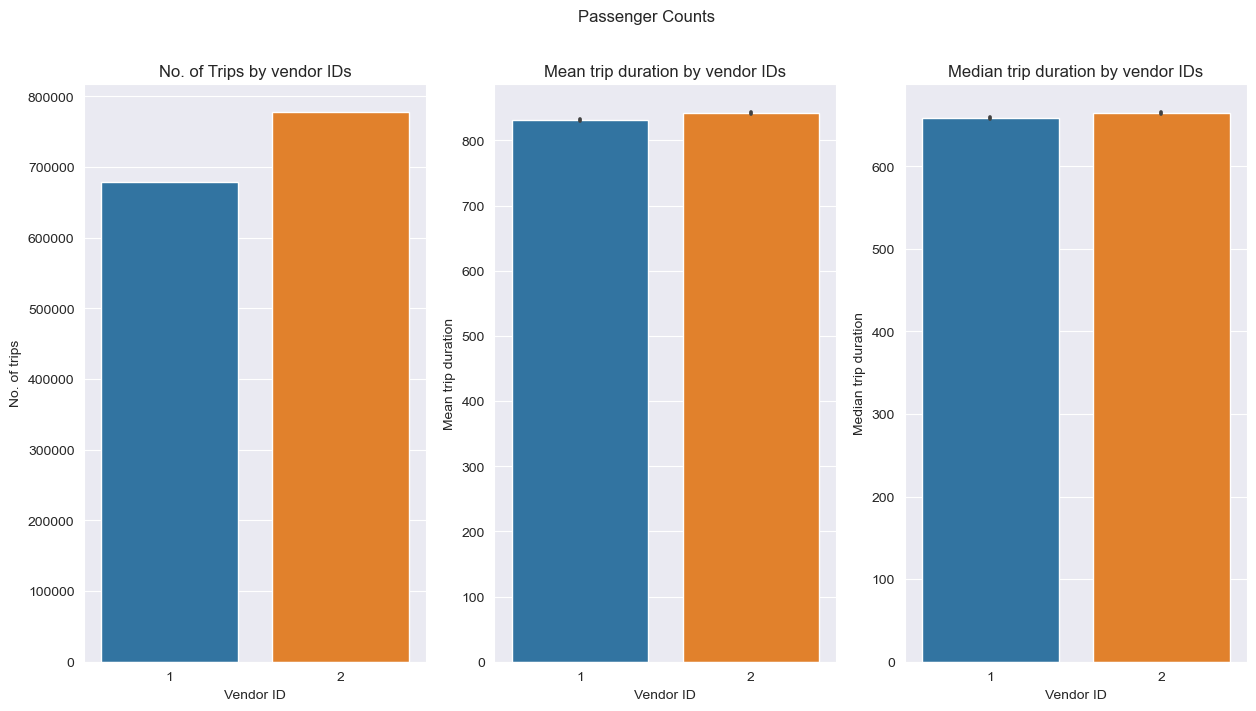

In [64]:
plt.figure(figsize=(15,7.5))
plt.suptitle('Passenger Counts')
plt.subplot(1,3,1)
fig = sb.countplot(x = data['vendor_id'])
fig.set(title = "No. of Trips by vendor IDs",xlabel='Vendor ID', ylabel='No. of trips')

plt.subplot(1,3,2)
fig = sb.barplot(x = data['vendor_id'],y=data['trip_duration'],estimator='mean')
fig.set(title = "Mean trip duration by vendor IDs",xlabel='Vendor ID', ylabel='Mean trip duration')

plt.subplot(1,3,3)
fig = sb.barplot(x = data['vendor_id'],y=data['trip_duration'],estimator='median')
fig.set(title = "Median trip duration by vendor IDs",xlabel='Vendor ID', ylabel='Median trip duration')
plt.show()

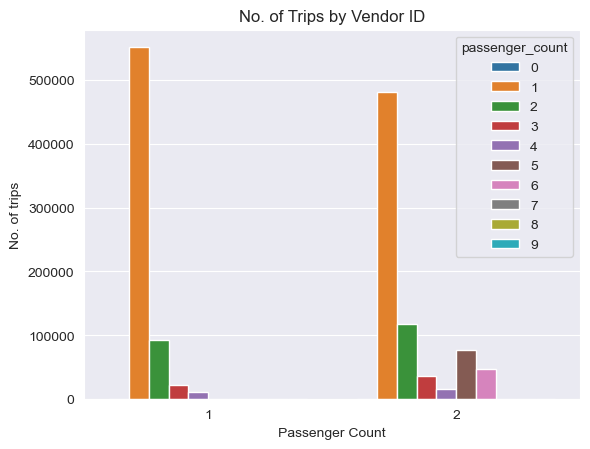

In [79]:
fig = sb.countplot(x = data['vendor_id'],hue=data['passenger_count'])
fig.set(title = "No. of Trips by Vendor ID",xlabel='Passenger Count', ylabel='No. of trips')
plt.show()

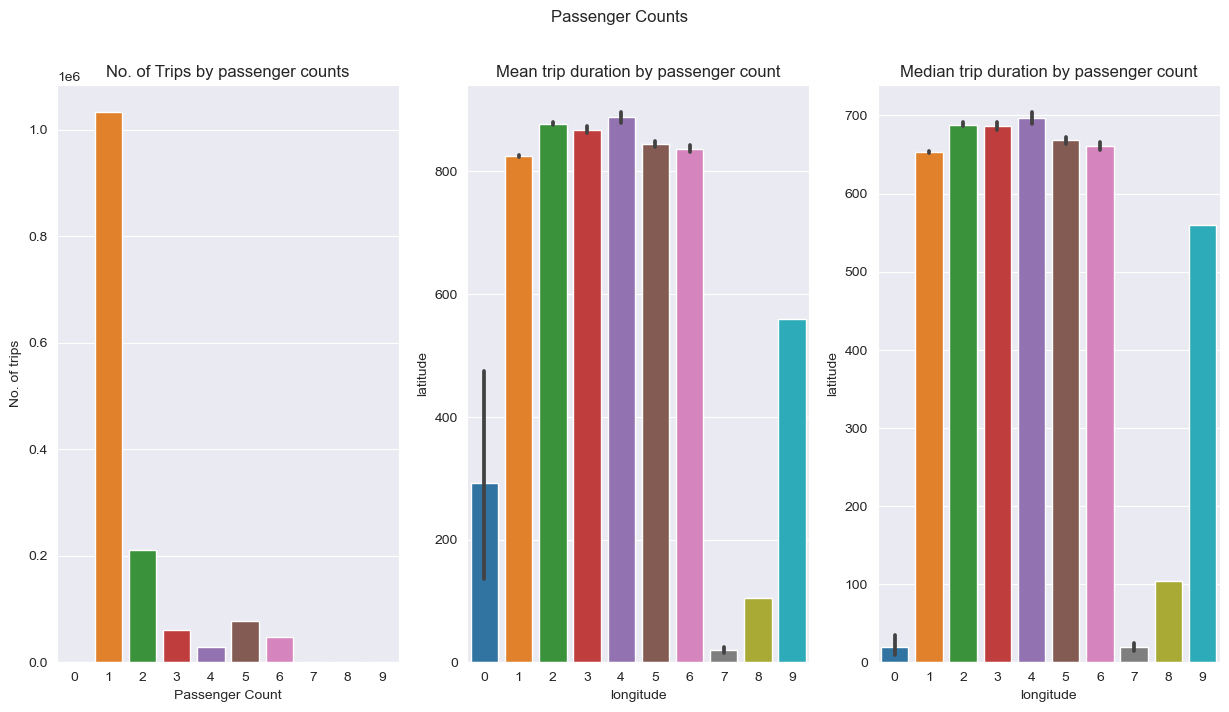

In [62]:
plt.figure(figsize=(15,7.5))
plt.suptitle('Passenger Counts')
plt.subplot(1,3,1)
fig = sb.countplot(x = data['passenger_count'])
fig.set(title = "No. of Trips by passenger counts",xlabel='Passenger Count',ylabel='No. of trips')

plt.subplot(1,3,2)
fig = sb.barplot(x = data['passenger_count'],y=data['trip_duration'],estimator='mean')
fig.set(title = "Mean trip duration by passenger count",xlabel='Passenger Count', ylabel='Mean trip duration')

plt.subplot(1,3,3)
fig = sb.barplot(x = data['passenger_count'],y=data['trip_duration'],estimator='median')
fig.set(title = "Median trip duration by passenger count",xlabel='Passenger Count', ylabel='Median trip duration')
plt.show()

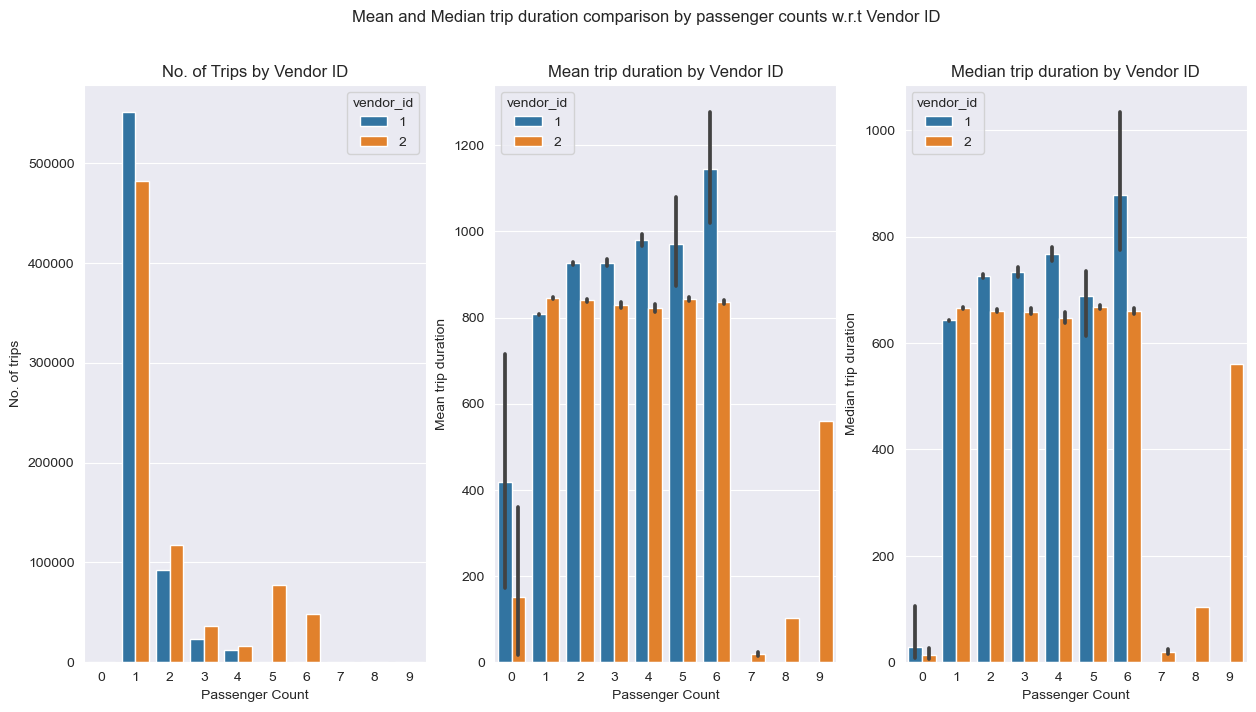

In [73]:
plt.figure(figsize=(15,7.5))
plt.suptitle('Mean and Median trip duration comparison by passenger counts w.r.t Vendor ID')

plt.subplot(1,3,1)
fig = sb.countplot(x = data['passenger_count'],hue=data['vendor_id'])
fig.set(title = "No. of Trips by Vendor ID",xlabel='Passenger Count', ylabel='No. of trips')

plt.subplot(1,3,2)
fig = sb.barplot(data=data, x="passenger_count", y='trip_duration',hue="vendor_id",estimator='mean')
fig.set(title = "Mean trip duration by Vendor ID",xlabel='Passenger Count',ylabel='Mean trip duration')

plt.subplot(1,3,3)
fig = sb.barplot(data=data, x="passenger_count", y='trip_duration',hue="vendor_id",estimator='median')
fig.set(title = "Median trip duration by Vendor ID",xlabel='Passenger Count',ylabel='Median trip duration')
plt.show()

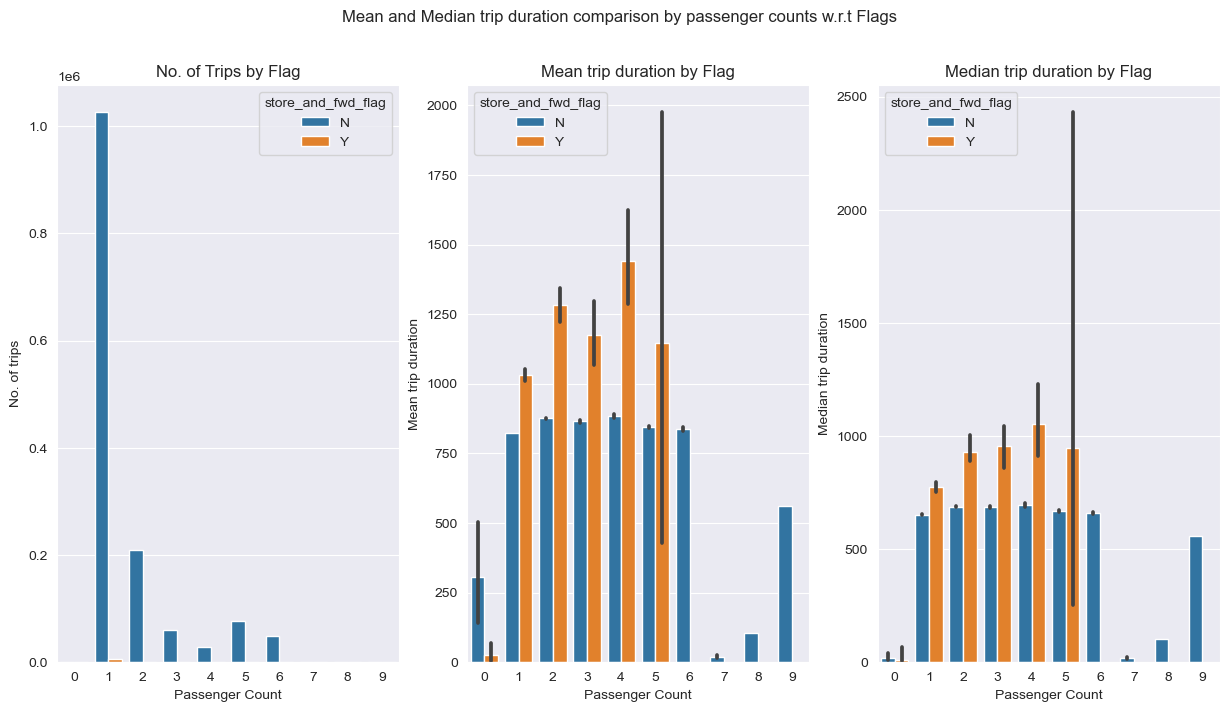

In [72]:
plt.figure(figsize=(15,7.5))
plt.suptitle('Mean and Median trip duration comparison by passenger counts w.r.t Flags')
plt.subplot(1,3,1)
fig = sb.countplot(x = data['passenger_count'],hue=data['store_and_fwd_flag'])
fig.set(title = "No. of Trips by Flag",xlabel='Passenger Count',ylabel='No. of trips')

plt.subplot(1,3,2)
fig = sb.barplot(data=data, x="passenger_count", y='trip_duration',hue="store_and_fwd_flag",estimator='mean')
fig.set(title = "Mean trip duration by Flag",xlabel='Passenger Count',ylabel='Mean trip duration')

plt.subplot(1,3,3)
fig = sb.barplot(data=data, x="passenger_count", y='trip_duration',hue="store_and_fwd_flag",estimator='median')
fig.set(title = "Median trip duration by Flag",xlabel='Passenger Count',ylabel='Median trip duration')
plt.show()

# 3) Feature Engineering

## Date and Time features

In [81]:
data['pickup_datetime'] = pd.to_datetime(data["pickup_datetime"])
data['dropoff_datetime'] = pd.to_datetime(data["dropoff_datetime"])

In [82]:
data['pickup_month'] = data['pickup_datetime'].dt.month
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_weekday'] = data['pickup_datetime'].dt.weekday
data['pickup_weekyear'] = data['pickup_datetime'].dt.week

C:\Users\arunt\AppData\Local\Temp\ipykernel_9024\2506468774.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['pickup_weekyear'] = data['pickup_datetime'].dt.week


In [81]:
data.shape

(1456535, 17)

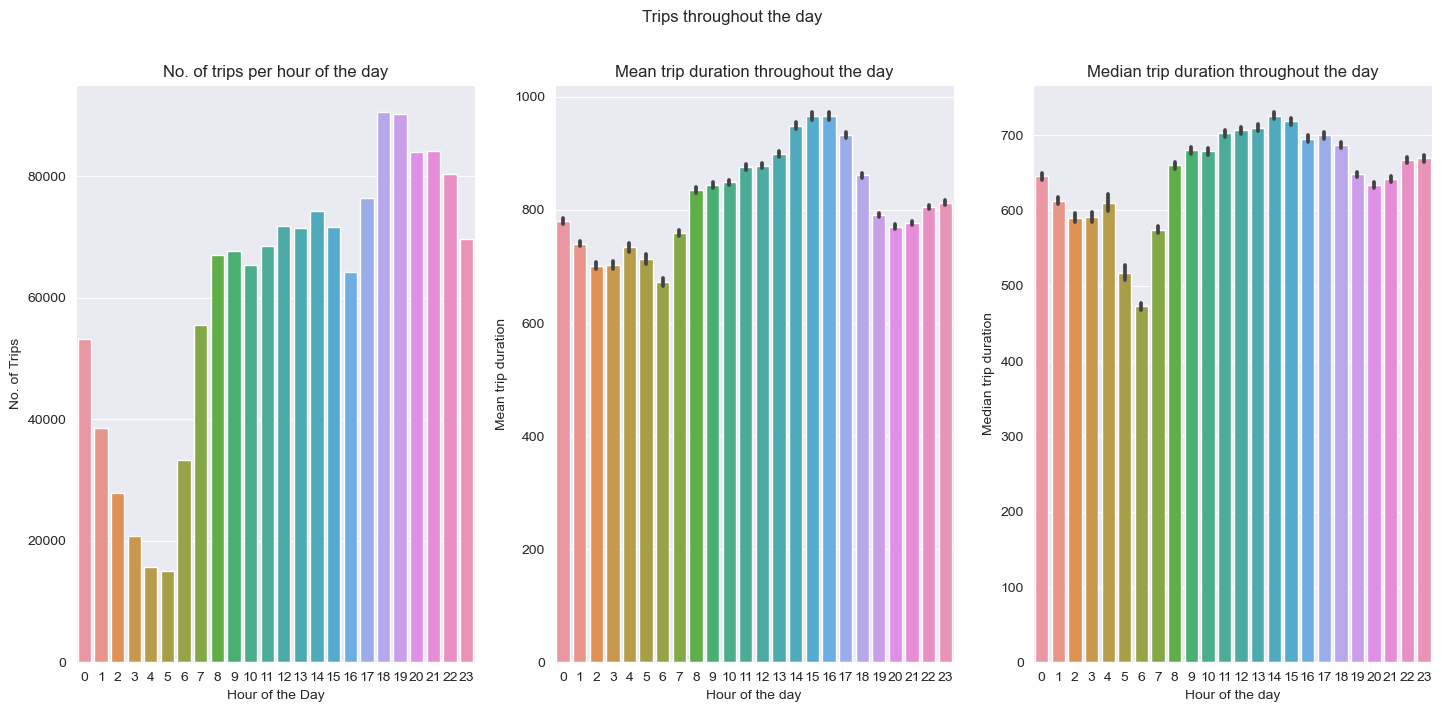

In [88]:
plt.figure(figsize=(17.5,7.5))
plt.suptitle('Trips throughout the day')
plt.subplot(1,3,1)
fig = sb.countplot(x=data["pickup_hour"])
fig.set(title = "No. of trips per hour of the day",xlabel='Hour of the Day', ylabel='No. of Trips')

plt.subplot(1,3,2)
fig = sb.barplot(x = data['pickup_hour'],y=data['trip_duration'],estimator='mean')
fig.set(title = "Mean trip duration throughout the day",xlabel='Hour of the day', ylabel='Mean trip duration')

plt.subplot(1,3,3)
fig = sb.barplot(x = data['pickup_hour'],y=data['trip_duration'],estimator='median')
fig.set(title = "Median trip duration throughout the day",xlabel='Hour of the day', ylabel='Median trip duration')

plt.show()

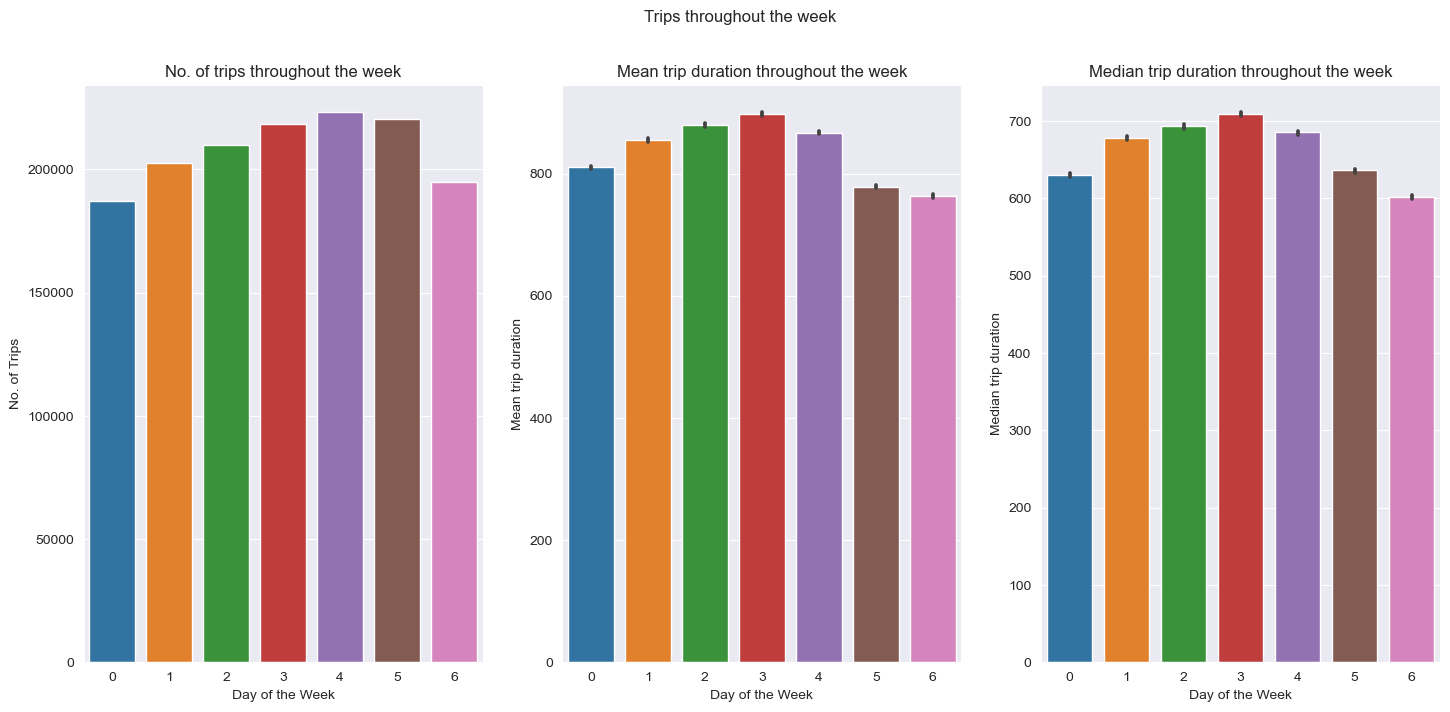

In [87]:
plt.figure(figsize=(17.5,7.5))
plt.suptitle('Trips throughout the week')
plt.subplot(1,3,1)
fig = sb.countplot(x=data["pickup_day_of_week"])
fig.set(title = "No. of trips throughout the week",xlabel='Day of the Week', ylabel='No. of Trips')

plt.subplot(1,3,2)
fig = sb.barplot(x = data['pickup_day_of_week'],y=data['trip_duration'],estimator='mean')
fig.set(title = "Mean trip duration throughout the week",xlabel='Day of the Week', ylabel='Mean trip duration')

plt.subplot(1,3,3)
fig = sb.barplot(x = data['pickup_day_of_week'],y=data['trip_duration'],estimator='median')
fig.set(title = "Median trip duration throughout the week",xlabel='Day of the Week', ylabel='Median trip duration')
plt.show()

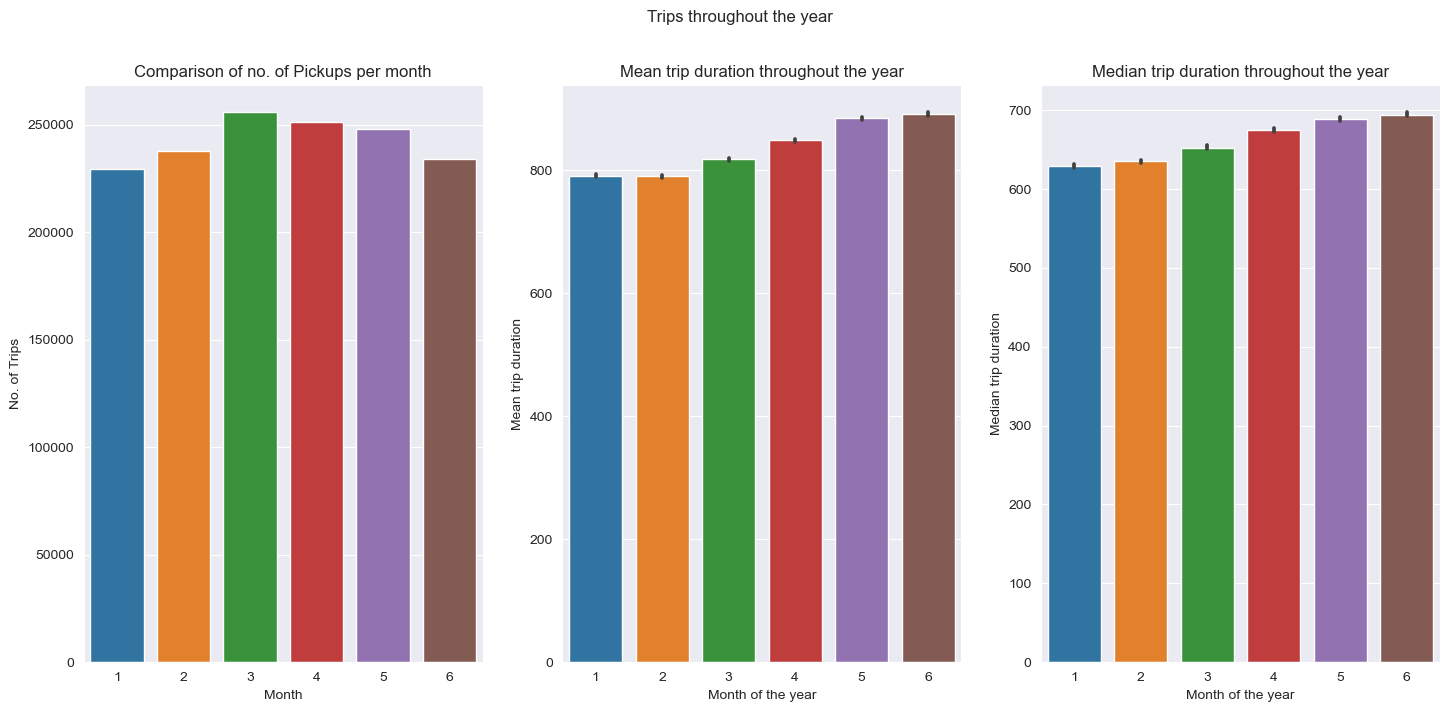

In [99]:
plt.figure(figsize=(17.5,7.5))
plt.suptitle('Trips throughout the year')
plt.subplot(1,3,1)
fig = sb.countplot(x=data["pickup_month"])
fig.set(title = "No. of Trips per month",xlabel='Month', ylabel='No. of Trips')

plt.subplot(1,3,2)
fig = sb.barplot(x = data['pickup_month'],y=data['trip_duration'],estimator='mean')
fig.set(title = "Mean trip duration throughout the year",xlabel='Month of the year', ylabel='Mean trip duration')

plt.subplot(1,3,3)
fig = sb.barplot(x = data['pickup_month'],y=data['trip_duration'],estimator='median')
fig.set(title = "Median trip duration throughout the year",xlabel='Month of the year', ylabel='Median trip duration')
plt.show()

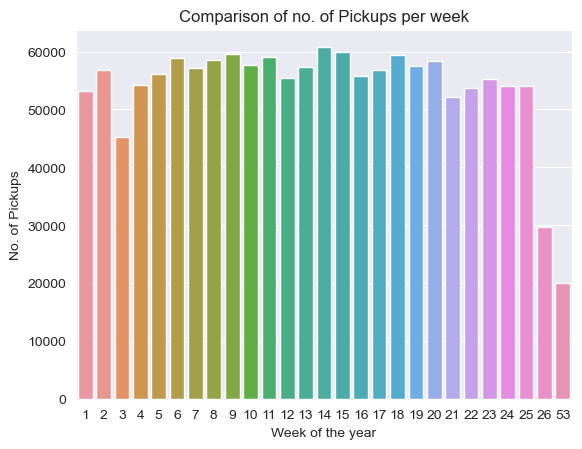

In [93]:
fig = sb.countplot(x=data["pickup_weekyear"])
fig.set(title = "Comparison of no. of Pickups per week",xlabel='Week of the year', ylabel='No. of Pickups')
plt.show()

In [87]:
data['pickup_weekyear'].describe()

count    1.456535e+06
mean     1.383924e+01
std      8.563962e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.300000e+01
75%      2.000000e+01
max      5.300000e+01
Name: pickup_weekyear, dtype: float64

## Distance features

1) geodesic distance
2) great circle distance
3) manhattan distance
4) haversine distance
5) euclidean distance

In [10]:
x1 = data['pickup_latitude'].values
y1 = data['pickup_longitude'].values
x2 = data['dropoff_latitude'].values
y2 = data['dropoff_longitude'].values

In [11]:
from geopy.distance import geodesic,great_circle
from sklearn.metrics.pairwise import euclidean_distances,manhattan_distances,haversine_distances
from scipy.spatial.distance import cityblock

In [12]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [75]:
len(data)

1456535

In [33]:
'''
picks = list(zip(x1, y1))
drops = list(zip(x2, y2))
# save in pandas 
#geodesic(picks[0],drops[0]).km
# now apply function on all the rows
df = pd.DataFrame({'pickups': picks, 'drops':drops})
#df.head(3)
def euclidean_dist(x):
    return np.linalg.norm(np.array((x[0])) - np.array((x[1])))
df.apply(euclidean_dist, axis=1)
'''

0          0.017680
1          0.020456
2          0.059934
3          0.013438
4          0.010690
             ...   
1456530    0.013791
1456531    0.057998
1456532    0.076327
1456533    0.010962
1456534    0.011106
Length: 1456535, dtype: float64

In [13]:
# calculate haversine distance and bear
haversine_dist = haversine_array(data['pickup_latitude'].values, data['pickup_longitude'].values, data['dropoff_latitude'].values, data['dropoff_longitude'].values)

bearing_dist = bearing_array(data['pickup_latitude'].values, data['pickup_longitude'].values, data['dropoff_latitude'].values, data['dropoff_longitude'].values)

In [14]:
from tqdm import tqdm
from scipy.spatial import distance
geodesic_dist = []
great_circle_dist =[]
euclidean_dist = []
manhattan_dist = []
for i in tqdm(range(len(data))):
    geodesic_dist.append(geodesic((x1[i],y1[i]), (x2[i],y2[i])).km) #geodesic distance
    great_circle_dist.append(great_circle((x1[i],y1[i]), (x2[i],y2[i])).km) # great circle
    euclidean_dist.append(distance.euclidean([x1[i],y1[i]],[x2[i],y2[i]])) #euclidean distance
    manhattan_dist.append(cityblock((x1[i],y1[i]), (x2[i],y2[i]))) #manhattan distance

100%|██████████████████████████████████████████████████████████████████████| 1456535/1456535 [13:03<00:00, 1859.67it/s]


In [60]:
#euclidean_distances([x1[i],y1[i]], [x2[i],y2[i]])
i=1000
print(distance.chebyshev([x1[i],y1[i]],[x2[i],y2[i]]))
print(distance.canberra([x1[i],y1[i]],[x2[i],y2[i]]))
print(distance.euclidean([x1[i],y1[i]],[x2[i],y2[i]]))
print(distance.sqeuclidean([x1[i],y1[i]],[x2[i],y2[i]]))
print(distance.cosine([x1[i],y1[i]],[x2[i],y2[i]]))
print(distance.braycurtis([x1[i],y1[i]],[x2[i],y2[i]]))

#print(np.linalg.norm(np.array((x1[i],y1[i])) - np.array((x2[i],y2[i]))))

0.039840698242194605
0.0006753721790010884
0.04845567093712052
0.002347952045966506
1.6280562331605353e-07
0.0002938061396805965
1.0


In [16]:
print(len(great_circle_dist))
print(len(manhattan_dist))
print(len(geodesic_dist))
print(len(euclidean_dist))

1456535
1456535
1456535
1456535


In [17]:
great_circle_dist[:10]

[1.4985228965327897,
 1.8055097193479819,
 6.38510751516883,
 1.4855005212623669,
 1.1885901383943924,
 1.0989440117289557,
 1.3262804506275783,
 5.71498870406324,
 1.3103551339564383,
 5.1211687965557635]

In [18]:
data['geodesic_dist'] = geodesic_dist
data['great_circle_dist'] = great_circle_dist
data['manhattan_dist'] = manhattan_dist
data['euclidean_dist'] = euclidean_dist
data['haversine_dist'] = haversine_dist
data['bearing_dist'] = bearing_dist

In [19]:
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,geodesic_dist,great_circle_dist,manhattan_dist,euclidean_dist,haversine_dist,bearing_dist
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.502172,1.498523,0.019859,0.017680,1.498521,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.808660,1.805510,0.026478,0.020456,1.805507,-117.153768
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.379687,6.385108,0.080158,0.059934,6.385098,-159.680165
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.483632,1.485501,0.015480,0.013438,1.485498,-172.737700
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.187038,1.188590,0.010818,0.010690,1.188588,179.473585
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1.099625,1.098944,0.016212,0.011572,1.098942,-44.995596
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,1.327329,1.326280,0.019669,0.014133,1.326279,47.505775
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,5.718013,5.714989,0.084026,0.059801,5.714981,136.385396
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,1.312559,1.310355,0.019279,0.014790,1.310353,118.284067
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,5.114807,5.121169,0.053699,0.046355,5.121162,7.603538


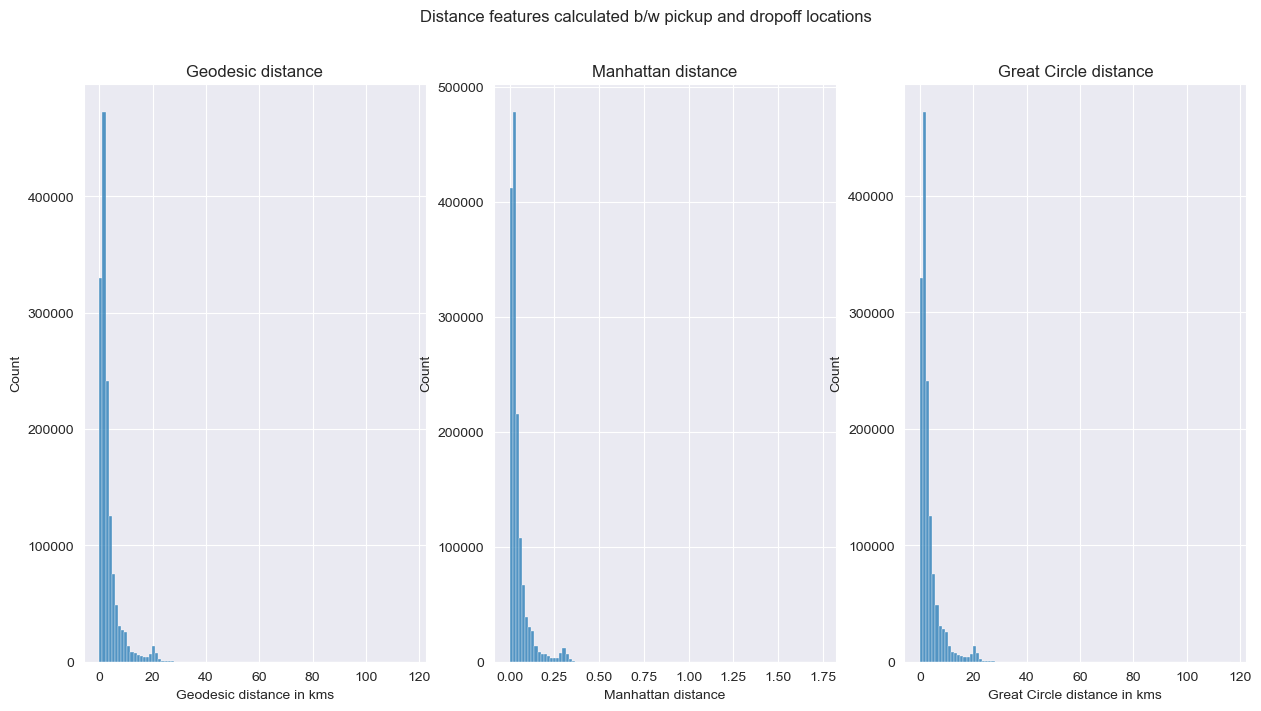

In [56]:
plt.figure(figsize=(15,7.5))
plt.suptitle('Distance features calculated b/w pickup and dropoff locations')
plt.subplot(1,3,1)
fig = sb.histplot(data['geodesic_dist'], bins=100)
fig.set(title = "Geodesic distance",xlabel='Geodesic distance in kms', ylabel='Count')

plt.subplot(1,3,2)
fig = sb.histplot(data['manhattan_dist'], bins=100)
fig.set(title = "Manhattan distance",xlabel='Manhattan distance')

plt.subplot(1,3,3)
fig = sb.histplot(data['great_circle_dist'], bins=100)
fig.set(title = "Great Circle distance",xlabel='Great Circle distance in kms')
plt.show()

In [104]:
distances_data = data[['geodesic_dist','great_circle_dist','euclidean_dist','manhattan_dist','haversine_dist','bearing_dist','trip_duration']]

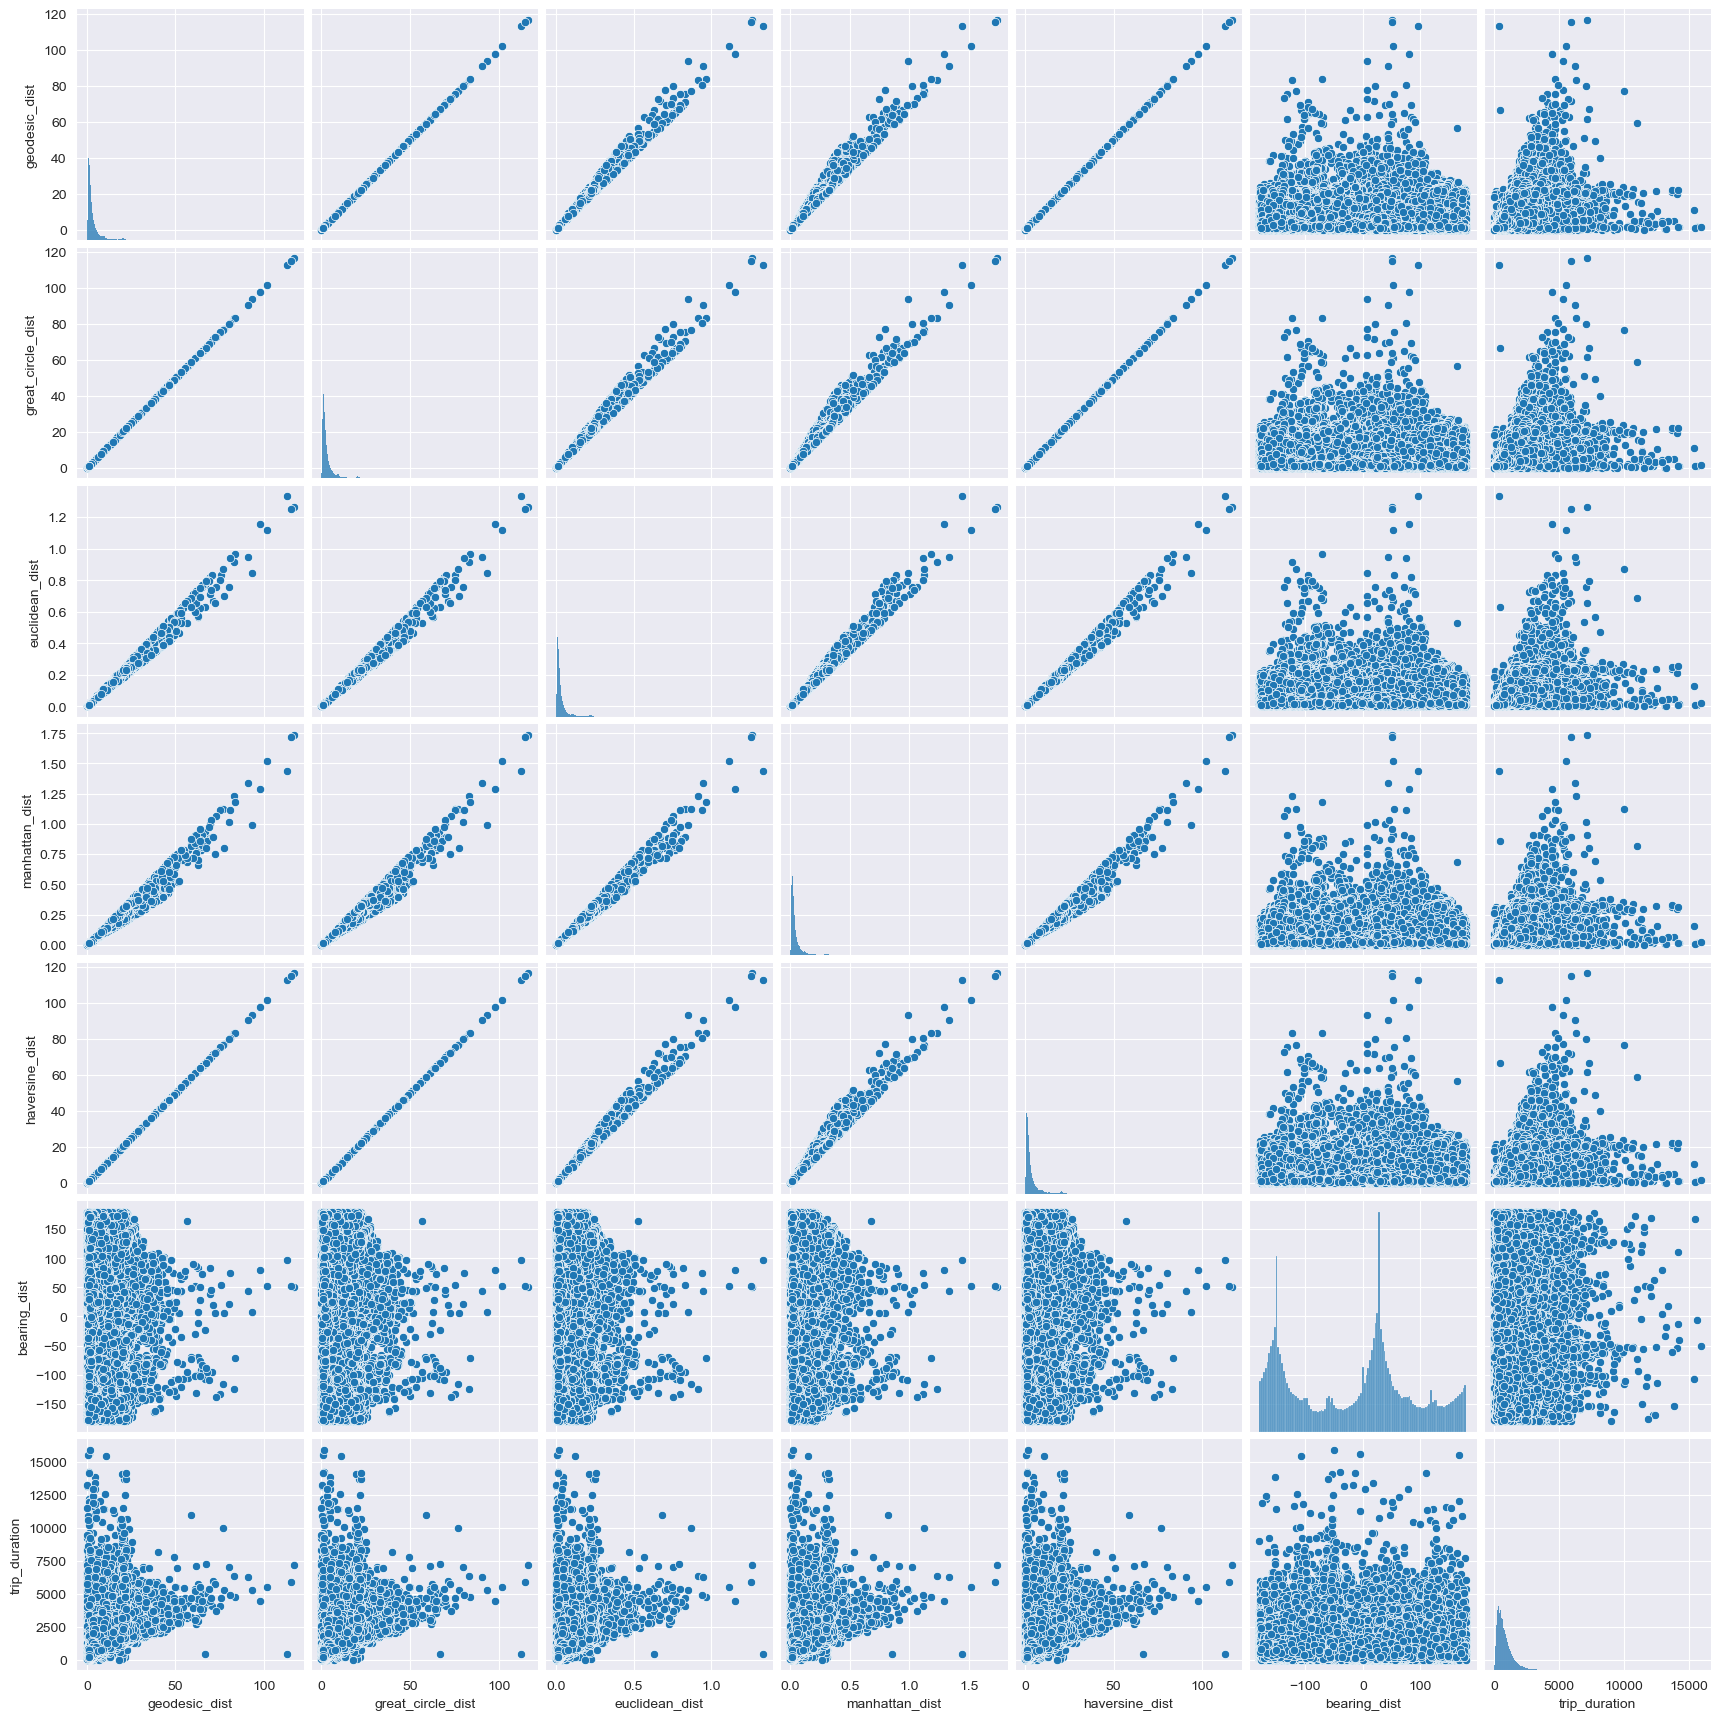

In [105]:
plt.figure(figsize=(17.5,7.5))
plt.suptitle('Comparison of distance variables with trip duration')
sb.pairplot(distances_data)
plt.show()

## Observation

1) Haversine distance wont have much impact when the distance betweeen the two locations is very small. In such cases, the earth's curvature is not taken into account.

2) Turns out, haversine distance is same as great circle distance

3) a



0          0.000044
1          0.000040
2          0.000038
3          0.000036
4          0.000025
             ...   
1458639    0.000023
1458640    0.000122
1458641    0.000140
1458642    0.000042
1458643    0.000079
Length: 1456535, dtype: float64

In [64]:
coords = np.hstack((data[['pickup_latitude', 'pickup_longitude','passenger_count']].values,
                    data[['dropoff_latitude', 'dropoff_longitude']].values))

In [65]:
coords

array([[ 40.76793671, -73.98215485,   1.        ,  40.76560211,
        -73.96463013],
       [ 40.73856354, -73.98041534,   1.        ,  40.73115158,
        -73.9994812 ],
       [ 40.7639389 , -73.97902679,   1.        ,  40.71008682,
        -74.00533295],
       ...,
       [ 40.76879883, -73.95912933,   1.        ,  40.70737076,
        -74.00443268],
       [ 40.74906158, -73.98207855,   1.        ,  40.75710678,
        -73.97463226],
       [ 40.78174973, -73.97953796,   1.        ,  40.79058456,
        -73.97280884]])

In [66]:
coords.shape

(1456535, 5)

In [67]:
data[['pickup_latitude', 'pickup_longitude']].values

array([[ 40.76793671, -73.98215485],
       [ 40.73856354, -73.98041534],
       [ 40.7639389 , -73.97902679],
       ...,
       [ 40.76879883, -73.95912933],
       [ 40.74906158, -73.98207855],
       [ 40.78174973, -73.97953796]])

In [72]:
from sklearn.cluster import KMeans
sample_ind = np.random.permutation(len(coords))[:700000]
kmeans = KMeans(n_clusters=30, init="k-means++").fit(coords[sample_ind])

C:\Users\arunt\anaconda3\envs\gpu-enabled-spatial\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:
prediction = kmeans.predict(coords)

In [74]:
prediction

array([ 9,  0,  0, ..., 13,  9, 25])

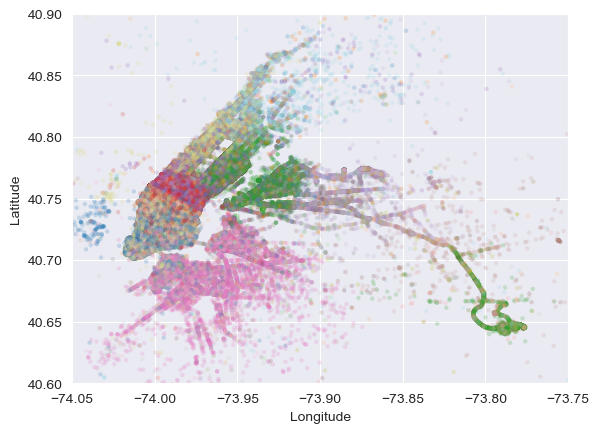

In [75]:
city_long_border = (-74.05, -73.75)
city_lat_border = (40.60, 40.90)

fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(data.pickup_longitude.values, data.pickup_latitude.values, s=10, lw=0,
           c=prediction, cmap='tab20', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [37]:
coords2 = np.vstack((data[['pickup_latitude', 'pickup_longitude']].values,
                    data[['dropoff_latitude', 'dropoff_longitude']].values))

In [41]:
sample_ind = np.random.permutation(len(coords))[:1000000]
kmeans2 = KMeans(n_clusters=100, init="k-means++").fit(coords2[sample_ind])
pickup_prediction = kmeans2.predict(data[['pickup_latitude', 'pickup_longitude']])
dropoff_prediction = kmeans2.predict(data[['dropoff_latitude', 'dropoff_longitude']])

C:\Users\arunt\anaconda3\envs\gpu-enabled-spatial\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arunt\anaconda3\envs\gpu-enabled-spatial\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
C:\Users\arunt\anaconda3\envs\gpu-enabled-spatial\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


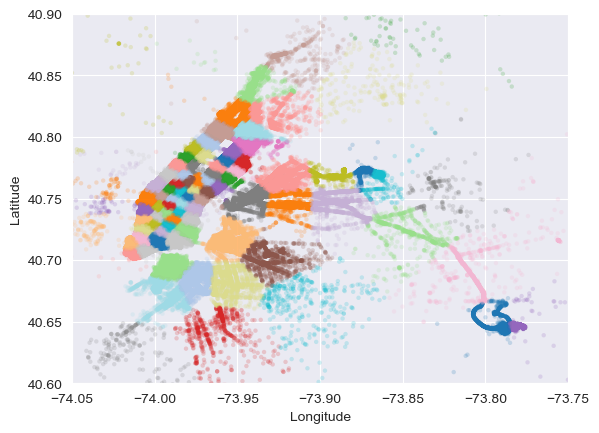

In [45]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(data.pickup_longitude.values, data.pickup_latitude.values, s=10, lw=0,
           c=pickup_prediction, cmap='tab20', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

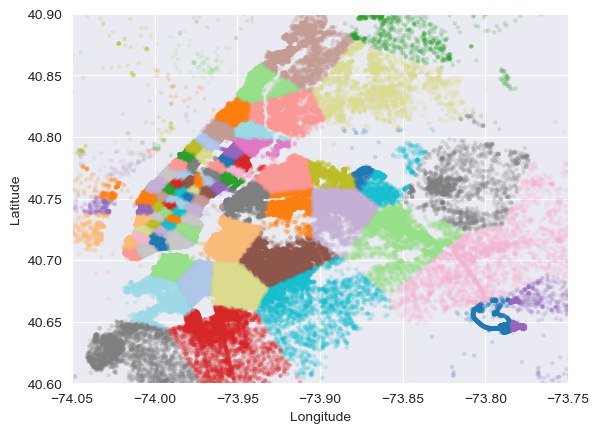

In [46]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(data.dropoff_longitude.values, data.dropoff_latitude.values, s=10, lw=0,
           c=dropoff_prediction, cmap='tab20', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

# Reference

1) https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa